# Indian Premiere League (IPL) 2022 Analysis using Python
Indian Premiere League (IPL) is a professional mens's T20 cricket league, contested by teams based out of seven Indian cities and three Indian states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme. 

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹47,500 crore, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹1,150 crore to the GDP of the Indian economy. The 2020 IPL season set a massive viewership record with 31.57 million average impressions and with an overall consumption increase of 23 per cent from the 2019 season.

There have been fifteen seasons of the IPL tournament. The current IPL title holder franchise is Gujarat Titans, winning the 2022 season.

In this notebook, Analysis of 2022 season & Team - Gujarat Titans (Winner of IPL 2022 season) was done with the help of datasets from Kaggle. 

# Importing the useful Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Importing the datasets of IPL Matches 2022 and IPL Ball by Ball Data

In [116]:
Team_name="Gujarat Titans"
data = pd.read_csv("IPL_Matches_2022.csv")
data1 = pd.read_csv("IPL_Ball_by_Ball_2022.csv")

# Checking the dataset of IPL Matches 2022

In [117]:
print(data.head())

        ID       City        Date  Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29    2022        Final   
1  1312199  Ahmedabad  2022-05-27    2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25    2022   Eliminator   
3  1312197    Kolkata  2022-05-24    2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22    2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden

# Checking the dataset of IPL Ball by Ball Data

In [118]:
print(data1.head())

        ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0     

# Unique Winning Teams

In [119]:
data['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings'], dtype=object)

# Number of Matches Won by each Team

In [120]:
figure = px.bar(data, x=data["WinningTeam"],
            title="Number of Matches Won by each Team")
figure.show()

# Number of Matches Won by Defending or Chasing

In [121]:
data["WonBy"] = data["WonBy"].map({"Wickets": "Chasing", 
                                     "Runs": "Defending"})
won_by = data["WonBy"].value_counts()
label = won_by.index
counts = won_by.values
colors = ['yellow','green']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches Won by Defending Or Chasing')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# Toss Won by each Team

In [122]:
figure = px.bar(data, x=data["TossWinner"],
            title="Toss Won by each Team")
figure.show()

# Toss Decision of either Fielding or Batting 

In [123]:
toss = data["TossDecision"].value_counts()
label = toss.index
counts = toss.values
colors = ['lightblue','yellow']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Toss Decision')
fig.update_traces(hoverinfo='label+percent', 
                  textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# Number of Times Player of the Match 

In [124]:
figure = px.bar(data, x=data["Player_of_Match"],
            title="No. of Times Player of the Match")
figure.show()

# IPL'22 Winner Gujarat Titans' Batsman Runs Scored

In [125]:
data1.loc[data1['BattingTeam']=='Gujarat Titans',['batter','batsman_run']].groupby('batter').sum().sort_values(by='batsman_run', ascending=False).style.background_gradient(cmap='gray_r')

,batsman_run
batter,
HH Pandya,487
Shubman Gill,483
DA Miller,481
WP Saha,317
R Tewatia,217
MS Wade,157
B Sai Sudharsan,145
A Manohar,108
Rashid Khan,91


# Chennai Super Kings' Batsman Runs Scored

In [126]:
data1.loc[data1['BattingTeam']=='Chennai Super Kings',['batter','batsman_run']].groupby('batter').sum().sort_values(by='batsman_run', ascending=False).style.background_gradient(cmap='gray_r')

,batsman_run
batter,
RD Gaikwad,368
S Dube,289
AT Rayudu,274
DP Conway,252
MM Ali,244
MS Dhoni,232
RV Uthappa,230
RA Jadeja,116
D Pretorius,44


# Mumbai Indians' Batsman Runs Scored

In [127]:
data1.loc[data1['BattingTeam']=='Mumbai Indians',['batter','batsman_run']].groupby('batter').sum().sort_values(by='batsman_run', ascending=False).style.background_gradient(cmap='gray_r')

,batsman_run
batter,
Ishan Kishan,418
Tilak Varma,397
SA Yadav,303
RG Sharma,268
TH David,186
D Brevis,161
KA Pollard,144
JD Unadkat,59
Ramandeep Singh,45


# Top 10 Wicket Takers against Gujarat Titans

In [128]:
data1.loc[data1['BattingTeam']=='Gujarat Titans',['bowler','isWicketDelivery']].groupby('bowler').sum().sort_values(by='isWicketDelivery', ascending=False).head(10).style.background_gradient(cmap='gray_r')

,isWicketDelivery
bowler,
Umran Malik,6
K Rabada,6
AD Russell,4
T Natarajan,3
Mustafizur Rahman,3
PWH de Silva,3
DJ Bravo,3
Avesh Khan,3
TG Southee,3


# Top 10 Wicket Takers against Chennai Super Kings

In [129]:
data1.loc[data1['BattingTeam']=='Chennai Super Kings',['bowler','isWicketDelivery']].groupby('bowler').sum().sort_values(by='isWicketDelivery', ascending=False).head(10).style.background_gradient(cmap='gray_r')

,isWicketDelivery
bowler,
DR Sams,7
RP Meredith,4
T Natarajan,4
A Nortje,3
GJ Maxwell,3
AJ Tye,3
PWH de Silva,3
HV Patel,3
AS Joseph,3


# Top 10 Wicket Takers againts Mumbai Indians

In [130]:
data1.loc[data1['BattingTeam']=='Mumbai Indians',['bowler','isWicketDelivery']].groupby('bowler').sum().sort_values(by='isWicketDelivery', ascending=False).head(10).style.background_gradient(cmap='gray_r')

,isWicketDelivery
bowler,
Mukesh Choudhary,6
PJ Cummins,6
Kuldeep Yadav,4
AD Russell,4
OF Smith,4
KH Pandya,4
YS Chahal,3
Umran Malik,3
PVD Chameera,3


# Batting Performance of Gujarat Titans (Champions) as compared to other Teams

In [131]:
over_stats = data1[['overs','total_run']].groupby('overs').mean()*6

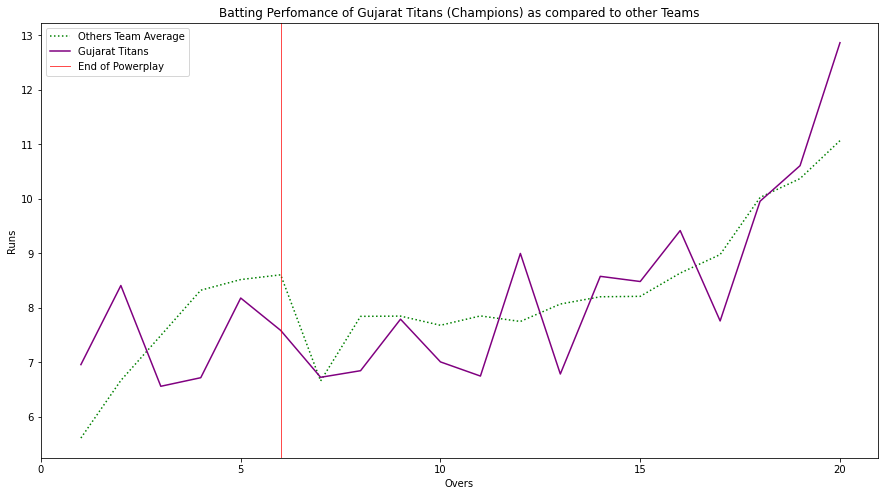

In [132]:
over_stats.rename(columns={'total_run':'league_average'})
over_stats['stats'] = data1.loc[data1['BattingTeam']=='Gujarat Titans',['overs','total_run']].groupby('overs').mean()*6
over_stats.index=np.arange(1,21)

plt.figure(figsize=(15,8))
plt.title('Batting Perfomance of Gujarat Titans (Champions) as compared to other Teams')

plt.plot(over_stats['total_run'].index, over_stats['total_run'].values,label='Others Team Average',color='green', linestyle=':')
plt.plot(over_stats['stats'], label='Gujarat Titans',color='purple')

plt.axvline(x=6, color='red', alpha=0.7, linewidth=1, label='End of Powerplay')


plt.xticks(np.arange(0,21,5))
plt.ylabel('Runs')
plt.xlabel('Overs')
plt.legend()

plt.savefig('Batting Perfomance of Gujarat Titans (Champions) as compared to other Teams', bbox_inches='tight')
plt.show()

# Bowling Performance of Gujarat Titans (Champions) as compared to other Teams

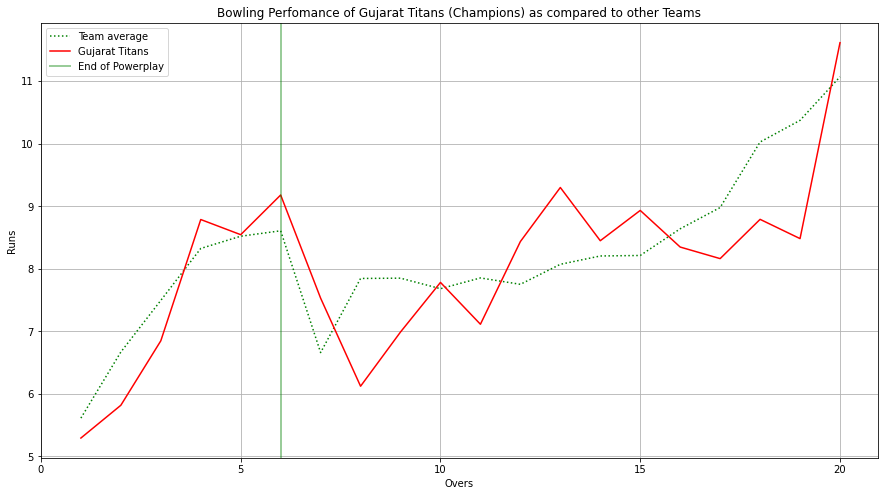

In [133]:
results = data.loc[(data['Team1']==Team_name) | (data['Team2']==Team_name), :].copy()
results['Vs'] = results['Team1'] + results['Team2']

match_ids = results['ID']

over_stats = data1[['overs','total_run']].groupby('overs').mean()*6
over_stats.rename(columns={'total_run':'league_average'})
over_stats['score'] = data1.loc[data1['BattingTeam']=='Gujarat Titans',['overs','total_run']].groupby('overs').mean()*6
over_stats['Concede'] = data1.loc[(data1['ID'].isin(match_ids)) & (data1['BattingTeam']!='Gujarat Titans')][['overs','total_run']
                                                                                               ].groupby('overs').mean()*6
over_stats.index=np.arange(1,21)

plt.figure(figsize=(15,8))
plt.title('Bowling Perfomance of Gujarat Titans (Champions) as compared to other Teams')
plt.plot(over_stats['total_run'].index, over_stats['total_run'].values,label='Team average',color='green', linestyle=':')
plt.plot(over_stats['Concede'], label='Gujarat Titans', color='red')
plt.axvline(x=6, color='green', alpha=0.4, linewidth=2, label='End of Powerplay', linestyle='-')


plt.xticks(np.arange(0,21,5))
plt.ylabel('Runs')
plt.xlabel('Overs')
plt.legend()

plt.grid()

plt.savefig('Bowling Perfomance of Gujarat Titans (Champions) as compared to other Teams',bbox_inches='tight')
plt.show()

# Gujarat Titans' Most Consistent Batsman

In [134]:
top_runs = data1[['batter','batsman_run']].loc[data1['BattingTeam']=='Gujarat Titans'].groupby('batter').sum().sort_values(
    by='batsman_run',ascending=False)[0:5]
top_run_getters = top_runs.index
top_runs.style.background_gradient(cmap='gray_r')

,batsman_run
batter,
HH Pandya,487
Shubman Gill,483
DA Miller,481
WP Saha,317
R Tewatia,217


In [135]:
top5 = data1[['ID','batter','batsman_run']].loc[(data1['BattingTeam']=='Gujarat Titans') 
                                             & (data1['batter'].isin(top_run_getters))
                                            ].groupby(['ID','batter']).sum().sort_index().unstack()
top5 = top5.cumsum()
top5.style.background_gradient(cmap='gray_r')

In [136]:
opponents_dates = results[['ID','Vs','Date']].copy().sort_values(by='ID')
opponents_dates['Vs'].replace({'Punjab Kings':'PK','Kolkata Knight Riders':'KKR','Rajasthan Royals':'RR',
                              'Mumbai Indians':'MI','Chennai Super Kings':'CSK','Delhi Capitals':'DC',
                              'Lucknow Super Giants':'LSG','Sunrisers Hyderabad':'SRH','Royal Challengers Bangalore':'RCB'
                              ,'Gujarat Titans':'GT'},
                              inplace=True)
opponents_dates['Index'] = '( ' + opponents_dates['Date'] + ' )  ' + opponents_dates['Vs'] 
opponents_dates.head().style.background_gradient(cmap='gray_r')

,ID,Vs,Date,Index
70,1304050,Lucknow Super GiantsGujarat Titans,2022-03-28,( 2022-03-28 ) Lucknow Super GiantsGujarat Titans
64,1304056,Gujarat TitansDelhi Capitals,2022-04-02,( 2022-04-02 ) Gujarat TitansDelhi Capitals
58,1304062,Punjab KingsGujarat Titans,2022-04-08,( 2022-04-08 ) Punjab KingsGujarat Titans
53,1304067,Gujarat TitansSunrisers Hyderabad,2022-04-11,( 2022-04-11 ) Gujarat TitansSunrisers Hyderabad
50,1304070,Gujarat TitansRajasthan Royals,2022-04-14,( 2022-04-14 ) Gujarat TitansRajasthan Royals


In [137]:
top5.index = opponents_dates['Index'].astype('str')

In [138]:
top5 = top5.fillna(method='ffill').fillna(0).applymap(lambda x: int(x))
top5.style.background_gradient(cmap='gray_r')

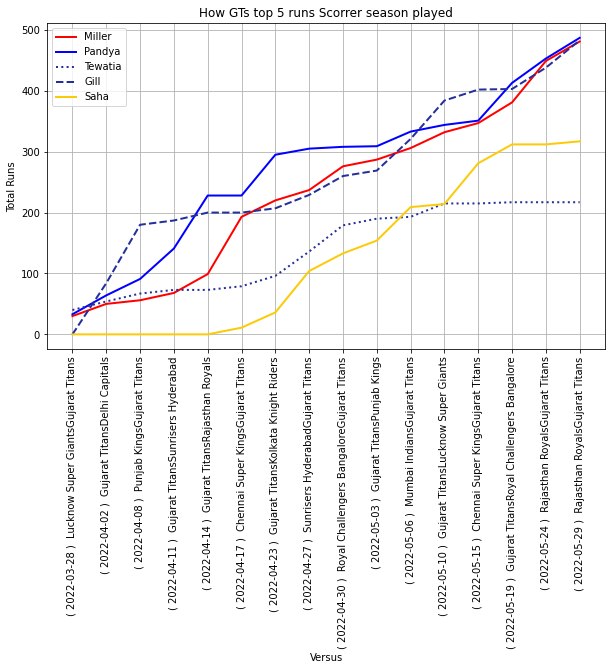

In [139]:
plt.figure(figsize=(10,6))
plt.plot(top5[('batsman_run','DA Miller')], label='Miller', color='red', linewidth=2)
plt.plot(top5[('batsman_run','HH Pandya')], label='Pandya', color='blue', linewidth=2)
plt.plot(top5[('batsman_run','R Tewatia')], label='Tewatia', color='#242F9B', linewidth=2, linestyle=':')
plt.plot(top5[('batsman_run','Shubman Gill')], label='Gill', color='#242F9B', linewidth=2, linestyle='--')
plt.plot(top5[('batsman_run','WP Saha')], label='Saha', color='#FBCB0A', linewidth=2)

plt.title("How GTs top 5 runs Scorrer season played")
plt.xticks(rotation=90)
plt.xlabel('Versus')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()


plt.savefig('How GTs top 5 runs Scorrer season played', bbox_inches='tight')
plt.show()